**Installing spacy (NLP) library which i will used for tokenization, lemmatization, Named Entity Recognition (NER), and part-of-speech tagging.**

In [3]:
#Install and load spacy
!pip install spacy

**It enables lemmatization, stopword removal, and text cleaning for our sentiment analysis. I'm going with the Small Model because it's fast and easy**

In [4]:
# Download the en_core_web_sm Model
#This Downloads the English (en_core_web_sm) model, which contains NLP features
#Like Tokenization, POS tagging, and named entity recognition


!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**installing the required tools for the preprocessing after that i will go for the preprocessing and the sentiment analysis as well.**

In [5]:
#Load the NLP Model
#spacy.load("en_core_web_sm") loads the pre-trained small model into
#memory for processing text
import spacy
#Load the small English NLP Model
nlp = spacy.load("en_core_web_sm")

**Uploading my txt file the book "Brief Answers of the Great Questions" by Stiphen Hawkings**

In [6]:
from google.colab import files
#upload multiple files manually
uploaded_files = files.upload()

Saving Brief_Answers.txt to Brief_Answers.txt


**Now i want to check how many files i have uploaded in my code**

In [7]:
import glob
#we use glob.glob() to retrieve all files matching a specific patterns

#Get a list of all text files in the folder

text_files = glob.glob("*.txt")
texts = []
for file_path in text_files:
  with open(file_path, "r",encoding='utf-8') as file:
    texts.append(file.read())

print(f"Loaded {len(texts)} documents")

Loaded 1 documents


**now i want to check the name of the files as i have uploaded only one filr but there are showing two documents has been uploaded.**

In [8]:
import glob

# List all text files in the current directory
text_files = glob.glob("*.txt")
print("Found text files:", text_files)


Found text files: ['Brief_Answers.txt']


**since there are two files with the same name may be there would be some error in my previous code that's why it took same file in lowercase and the uppercase. so i will delete one any then proceed with the preprocessing part which is essential for the sentiment analysis.**

**after deleting the one document let me check whether the one document is available or not.**

In [11]:
import glob

# List all text files in the current directory
text_files = glob.glob("*.txt")
print("Found text files:", text_files)


Found text files: ['Brief_Answers.txt']


**let me check again how many documents i have uploaded because i do not want any kind of discrepency ahead**

In [12]:
import glob
#we use glob.glob() to retrieve all files matching a specific patterns

#Get a list of all text files in the folder

text_files = glob.glob("*.txt")
texts = []
for file_path in text_files:
  with open(file_path, "r",encoding='utf-8') as file:
    texts.append(file.read())

print(f"Loaded {len(texts)} documents")

Loaded 1 documents


**ok now i am sure about the document so i'll perform the first part of the preprocessing which is Tokenization, since i can't print all the words here because it contains approx 50000 words as i have counted in the word. So i'll keep all the words in a list which i will refer as token_list**

In [13]:
tokens_list = []  # Store tokens without printing

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc])  # Store tokens in a list

# Print total tokens count instead of actual tokens
print(f"Total tokens generated: {len(tokens_list)}")

Total tokens generated: 57178


**Now all the tokens has been generated, during the tokenization process the stopwords and the special characters also counted as the separate tokens so i will remove all the stopwords which already available in the nlp(i)**

In [14]:
# Process the text
tokens_list = []  # Store tokens without stopwords

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc if not token.is_stop])  # Remove stopwords

# Print the total number of tokens after removing stopwords
print(f"Total tokens after removing stopwords: {len(tokens_list)}")

Total tokens after removing stopwords: 30111


**total tokens after the stop words removal is 30111. let me check some tokens to make sure all the stopwords has been removed correctly.**

In [15]:
# Process the text
lemmatized_tokens = []  # Store lemmatized words

for i in texts:
    doc = nlp(i)  # Process each text
    lemmatized_tokens.extend([token.lemma_ for token in doc if not token.is_stop])  # Lemmatize & remove stopwords

# Print total tokens after lemmatization
print(f"Total tokens after lemmatization: {len(lemmatized_tokens)}")

# Print a sample of first 20 lemmatized words (for verification)
print("Sample lemmatized words:", lemmatized_tokens[:20])

Total tokens after lemmatization: 30111
Sample lemmatized words: ['\x0c\x0c', 'Copyright', '©', '2018', 'Spacetime', 'Publications', 'Limited', '\n', 'Foreword', 'copyright', '©', '2018', 'Eddie', 'Redmayne', '\n', 'Introduction', 'copyright', '©', '2018', 'Kip']


**after removing the stopwords i can see still the special characters and the numericals are there in the text which is not necessary for my sentiment analysis part so i will remove all of that again applying the code.**

In [16]:
lemmatized_tokens = []  # Store cleaned words

for i in texts:
    doc = nlp(i)  # Process each text
    lemmatized_tokens.extend([
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Remove stopwords & keep only words (no numbers/symbols)
    ])

# Print total cleaned tokens
print(f"Total cleaned tokens: {len(lemmatized_tokens)}")

# Print a sample of first 20 cleaned lemmatized words
print("Sample cleaned lemmatized words:", lemmatized_tokens[:20])

Total cleaned tokens: 20272
Sample cleaned lemmatized words: ['Copyright', 'Spacetime', 'Publications', 'Limited', 'Foreword', 'copyright', 'Eddie', 'Redmayne', 'Introduction', 'copyright', 'Kip', 'Thorne', 'Afterword', 'copyright', 'Lucy', 'Hawking', 'right', 'reserve', 'publish', 'United']


**Now i will excute the code for the POS tagging, and will check on 10 words from my cleaned text to check whther everything is fine or now becuse i don't want to print all the 20000 tokens.**

In [17]:
# Process the text using spaCy
doc = nlp(" ".join(lemmatized_tokens))

# Extract POS tagging
pos_tags = [(token.text, token.pos_) for token in doc]

# Print first 20 POS tags for checking
print("Sample POS Tags:", pos_tags[:20])


Sample POS Tags: [('Copyright', 'PROPN'), ('Spacetime', 'PROPN'), ('Publications', 'PROPN'), ('Limited', 'PROPN'), ('Foreword', 'PROPN'), ('copyright', 'NOUN'), ('Eddie', 'PROPN'), ('Redmayne', 'PROPN'), ('Introduction', 'PROPN'), ('copyright', 'NOUN'), ('Kip', 'PROPN'), ('Thorne', 'PROPN'), ('Afterword', 'PROPN'), ('copyright', 'NOUN'), ('Lucy', 'PROPN'), ('Hawking', 'PROPN'), ('right', 'PROPN'), ('reserve', 'NOUN'), ('publish', 'VERB'), ('United', 'PROPN')]


**Now i will excute the same code for the NER as well. but in the result for 20 words i can clearly see that their  are some mistakes during NER.**

In [18]:
# Extract Named Entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print first 20 named entities
print("Sample Named Entities:", entities[:20])


Sample Named Entities: [('Eddie Redmayne Introduction', 'PERSON'), ('Kip Thorne Afterword', 'PERSON'), ('Lucy Hawking', 'PERSON'), ('United States', 'GPE'), ('Bantam Books', 'PERSON'), ('Random House', 'ORG'), ('Penguin Random House', 'PERSON'), ('New York', 'GPE'), ('HOUSE', 'ORG'), ('Penguin Random House', 'PERSON'), ('United Kingdom', 'GPE'), ('John Murray Publishers', 'PERSON'), ('Photograph', 'PRODUCT'), ('Stephen', 'GPE'), ('Andre Pattenden Hardback ISBN Ebook', 'FAC'), ('Craig Burgess', 'PERSON'), ('Cover', 'ORG'), ('Dan Rembert Cover', 'PERSON'), ('Shutterstock ep', 'PERSON'), ('Foreword Eddie Redmayne', 'PERSON')]


**after cleaning the all stopwords now i have aapprox 20000 words. now i will install the necessary libraries for the sentiment analysis procedure.**

In [19]:
# Install libraries (if not already installed)
!pip install textblob nltk wordcloud matplotlib seaborn

import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download VADER sentiment analyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**now i will check the polarity of the text in terms of the positive and negative. i will use the TextBlob which has both functions as subjetivity score also.**

In [20]:
# Perform sentiment analysis using TextBlob
text_blob_analysis = TextBlob(" ".join(lemmatized_tokens))

# Get polarity and subjectivity
polarity = text_blob_analysis.sentiment.polarity
subjectivity = text_blob_analysis.sentiment.subjectivity

# Print results
print(f"TextBlob Polarity Score: {polarity}")  # -1 (negative) to +1 (positive)
print(f"TextBlob Subjectivity Score: {subjectivity}")  # 0 (objective) to 1 (subjective)


TextBlob Polarity Score: 0.07564264180457313
TextBlob Subjectivity Score: 0.48716662609964834


**Although the VADER is used for the sentiment analysis of the short text like reviews twitter comments but i am applying it for the whole text to get the result for my better understanding.**

In [21]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
vader_sentiment = sia.polarity_scores(" ".join(lemmatized_tokens))

# Print results
print(f"VADER Sentiment Scores: {vader_sentiment}")


VADER Sentiment Scores: {'neg': 0.089, 'neu': 0.718, 'pos': 0.194, 'compound': 1.0}


**Now moving forward to generate the plot for the VADER result for interpretation of the scores.**

<ipython-input-22-61988cee2dd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")


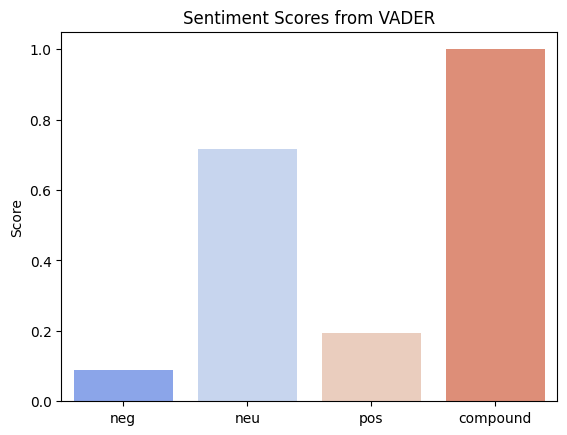

In [22]:
# Plot sentiment scores using Seaborn
sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")
plt.title("Sentiment Scores from VADER")
plt.ylabel("Score")
plt.show()


**Again visualizing the whole text using the word cloud for the result of TextBlob.**

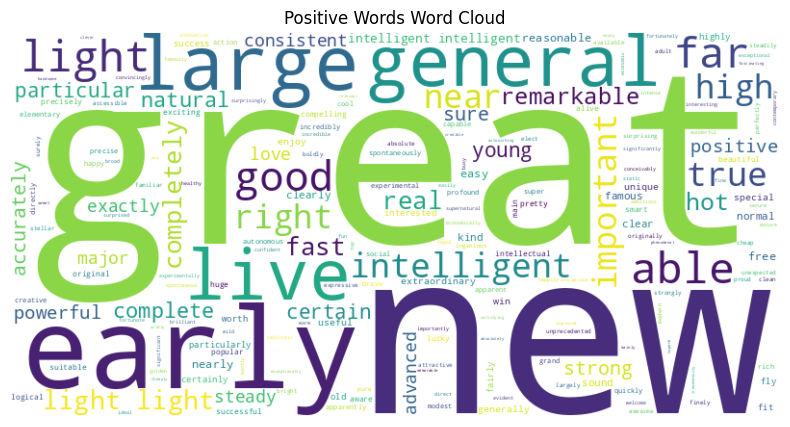

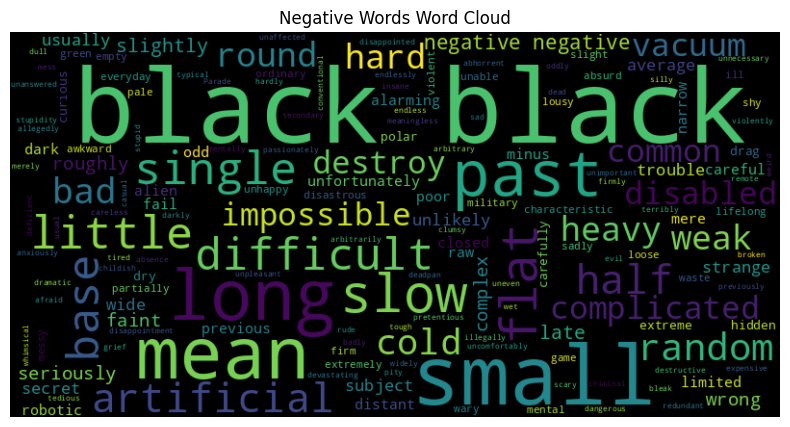

In [23]:
# Generate Word Cloud for positive words
positive_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity > 0])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words Word Cloud")
plt.show()

# Generate Word Cloud for negative words
negative_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity < 0])

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words Word Cloud")
plt.show()


**Now i will use one more method of text mining as per the guidelines, i will choose the KWIC**

In [24]:
def kwic_analysis(text, keyword, window=5):
    words = text.split()
    keyword = keyword.lower()

    for i, word in enumerate(words):
        if word.lower() == keyword:
            left_context = " ".join(words[max(0, i-window):i])
            right_context = " ".join(words[i+1:i+window+1])
            print(f"... {left_context} **{word}** {right_context} ...\n")

# Example: Check how "God" is used in the book
kwic_analysis(" ".join(lemmatized_tokens), "God")


... Thorne ask Big Questions chapter **God** chapter begin chapter Intelligent Life ...

... answer question deeply rooted science **God** begin predict future inside black ...

... question discuss origin universe require **God** create set go hear light ...

... science break appeal religion hand **God** determine universe start clearly fundamental ...

... dream begin fortunate come true **GOD** S cience increasingly answer question ...

... ask come long ago answer **god** world scary place people tough ...

... run headline page say hawking **God** create Universe article illustrate God ...

... God create Universe article illustrate **God** show drawing Michelangelo look thunderous ...

... smug look like duel grudge **God** want impression work prove disprove ...

... impression work prove disprove existence **God** work find rational framework understand ...

... people like live curse inflict **God** suppose possible upset prefer think ...

... law obey like law work **God** d

In [25]:
from collections import Counter

# Count word frequencies
word_freq = Counter(lemmatized_tokens)

# Print the 10 most common words
print(word_freq.most_common(10))


[('time', 300), ('universe', 274), ('space', 220), ('hole', 182), ('black', 170), ('year', 148), ('like', 132), ('life', 123), ('human', 108), ('science', 104)]
